## Goal
Use your data science knowledge to explore the data provided and create Linear Regression models to predict how many bikes will be rented based on historical information.
## Course Learning Outcomes (CLO) Assessed
- CLO #1 Explain common models and processing pipelines in machine learning applications
- CLO #2 Apply machine learning algorithms to design solutions for real problems
- CLO #4 Analyse results and solutions to verify their correctness and impact on decision making
## Assessment Criteria and Rubric
This assessment is about data exploration and reasoning over the modelling outcome.
You will likely face overfitting and will have to iterate between data engineering and modelling until you get satisfactory results.
It is taken for granted that the code must be readable and has comments indicating what are you doing. Poor readability will detract points from grading.
### Data Engineering
When appropriate:
- Data quality (no nulls or structural errors).
- Dummy variables created.
- New variables are created (when appropriate).
- Outliers treatments
### Exploratory Data Analysis
#### Exploration of:
- Numerical features
- Categorical features
- Statistical analysis
- Correlations
### Data pre-processing
#### When appropriate:
- Scaling
- Train/Test split
### Modelling
#### At least:
- Three LR models (Vanilla, Ridge, Lasso).
- RMSE at acceptable levels.
#### Nice to have:
- No overfitting. (r2 near 1, or RMSE below 0 is normally a clear indicator that you are overfitting)
- Models RMSE at acceptable levels.
- Models R2 at acceptable levels.
- Parameters optimised (when appropriate).
### Reasoning
1. Explain why you decided to do things the way you did.
2. For example, but not limited to:
3. Why plot "XYZ"? What did you want to see?
4. Why use the "XYZ" approach? (scaling or not scaling, using parameter A or B etc.)
5. Why do you think model A is better than B?
6. Why feature A has more relevance than feature B?

In [63]:
import pandas as pd

In [64]:
df = pd.read_csv('Energy_Consumption_Data.csv')
print(df)

       House_ID Month  Area_sq_ft Occupants Heating_Type  Age_of_Building  \
0          7271   Jan       662.0         5          NaN               27   
1           861   Oct      1253.0         2          NaN               13   
2          5391   Dec         NaN         3          Gas               22   
3          5192   Aug      1535.0         1          NaN               16   
4          5735   Sep      1336.0         5          NaN               13   
...         ...   ...         ...       ...          ...              ...   
99995      5681   Nov       818.0         3          Gas               12   
99996      8130   Dec      1521.0         5          NaN               24   
99997      4647   Aug      1086.0         4     Electric               33   
99998      2738   Mar         NaN         1     Electric               13   
99999      7874   Jun      2062.0         2          NaN               13   

      Insulation_Quality  Daily_Average_Consumption_kWh  Season  \
0       

In [65]:
# df.info()
df.head()

,House_ID,Month,Area_sq_ft,Occupants,Heating_Type,Age_of_Building,Insulation_Quality,Daily_Average_Consumption_kWh,Season,Energy_Efficiency_Rating,Tariff_Type,Bill_Amount,Renewable_Energy_Installed,Temperature_Average,Power_Outages,Monthly_Consumption_kWh
0,7271,Jan,662.0,5,NaN,27,Good,14.335539,Spring,2,Time-of-Use,88.741986,Yes,55.467771,1,501.232780
1,861,Oct,1253.0,2,NaN,13,cverage,25.917839,Spring,3,Variable,92.354940,Yes,36.388473,1,742.352878
2,5391,Dec,NaN,3,Gas,22,Poor,33.127843,Summer,6,Fixed,96.708638,No,94.550243,0,1018.708608
3,5192,Aug,1535.0,1,NaN,16,Good,7.451494,Autumn,6,Variable,95.568663,No,62.862087,2,199.420939
4,5735,Sep,1336.0,5,NaN,13,Excellent,34.649571,Winter,10,Variable,NaN,No,93.559405,3,933.151370


In [66]:
# Useful variables
columnNames = ['House_ID', 'Month', 'Area_sq_ft', 'Occupants', 'Heating_Type',
    'Age_of_Building', 'Insulation_Quality',
    'Daily_Average_Consumption_kWh', 'Season', 'Energy_Efficiency_Rating',
    'Tariff_Type', 'Bill_Amount', 'Renewable_Energy_Installed',
    'Temperature_Average', 'Power_Outages', 'Monthly_Consumption_kWh'
    ]

In [67]:
def printColumnValues(df, column_name):
    # Convert the column values to a list
    values = df[column_name].unique().tolist()

    # Print the list
    print(values)

In [68]:
# Initialize an empty list to store the sizes
sizes = []
def dfSize(df):
    # Get the current size of the DataFrame
    current_size = df.shape
    print(f"Current size: {current_size}")
    # If there are previous sizes stored, print the last one
    if sizes:
        print(f"Previous size: {sizes[-1]}")
    # Store the current size
    sizes.append(current_size)

### Cleaning Data To-Do
After using the above function to see what kind of unique variables are within each of the columns. I have summarized how to approach the `data cleaning` 
- ~~`House_ID` - Drop~~
- ~~`Month` - Drop~~
- ~~`Area_sq_ft` - Check Float~~
- ~~`Occupants` - convert 'five' to 5~~
- ~~`Heating_Type` - Word length is word~~
- ~~`Age_of_Building` - remove --~~
- ~~`Insulation_Quality` - Word length is word~~
- ~~`Daily_Average_Consumption_kWh` - no **negatives**, float, no **Null**~~
~~- `Season` - Use this to sort~~
- ~~`Energy_Efficiency_Rating` - 1-10 not too sure how useful~~
- ~~`Tariff_Type` - Its fucked Word length is Words~~
- `Bill_Amount` - no **negatives**, float, no **Null**
- `Renewable_Energy_Installed` - Kind of useless
- `Temperature_Average` - not really that useful
- `Power_Outages` - remove as it will affect the linear regression
- `Monthly_Consumption_kWh` - cant figure out if its derived from daily consumption

In [69]:
dfSize(df)

Current size: (100000, 16)


In [70]:
# df.dtypes

In [71]:
# Drop columns that are not useful
# We do not need to know what house ID is consuming the energy
df.drop('House_ID', axis=1, inplace=True)
df.head() # Check if the column was dropped

,Month,Area_sq_ft,Occupants,Heating_Type,Age_of_Building,Insulation_Quality,Daily_Average_Consumption_kWh,Season,Energy_Efficiency_Rating,Tariff_Type,Bill_Amount,Renewable_Energy_Installed,Temperature_Average,Power_Outages,Monthly_Consumption_kWh
0,Jan,662.0,5,NaN,27,Good,14.335539,Spring,2,Time-of-Use,88.741986,Yes,55.467771,1,501.232780
1,Oct,1253.0,2,NaN,13,cverage,25.917839,Spring,3,Variable,92.354940,Yes,36.388473,1,742.352878
2,Dec,NaN,3,Gas,22,Poor,33.127843,Summer,6,Fixed,96.708638,No,94.550243,0,1018.708608
3,Aug,1535.0,1,NaN,16,Good,7.451494,Autumn,6,Variable,95.568663,No,62.862087,2,199.420939
4,Sep,1336.0,5,NaN,13,Excellent,34.649571,Winter,10,Variable,NaN,No,93.559405,3,933.151370


In [72]:
# We do not need to know the month as season is a better general indicator for prediction
df.drop('Month', axis=1, inplace=True)
df.head() # Check if the column was dropped


,Area_sq_ft,Occupants,Heating_Type,Age_of_Building,Insulation_Quality,Daily_Average_Consumption_kWh,Season,Energy_Efficiency_Rating,Tariff_Type,Bill_Amount,Renewable_Energy_Installed,Temperature_Average,Power_Outages,Monthly_Consumption_kWh
0,662.0,5,NaN,27,Good,14.335539,Spring,2,Time-of-Use,88.741986,Yes,55.467771,1,501.232780
1,1253.0,2,NaN,13,cverage,25.917839,Spring,3,Variable,92.354940,Yes,36.388473,1,742.352878
2,NaN,3,Gas,22,Poor,33.127843,Summer,6,Fixed,96.708638,No,94.550243,0,1018.708608
3,1535.0,1,NaN,16,Good,7.451494,Autumn,6,Variable,95.568663,No,62.862087,2,199.420939
4,1336.0,5,NaN,13,Excellent,34.649571,Winter,10,Variable,NaN,No,93.559405,3,933.151370


After dropping `Month` and `House_ID` the data-frame can start to be cleaned.

In [73]:
dfSize(df)

Current size: (100000, 14)
Previous size: (100000, 16)


### Outliers
Created a function which takes a df and a column and removes the outliers based on the IQR.

In [74]:
def outliersBeGone(df, column):    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    dfOut = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return dfOut

#### Area Square Foot
- Drop `NaN` rows
- Anything below equal or below `zero` removed and needs to be `float`
- ***fix*** Value may be not be `float` but valid !!!! Still needs to be done

In [75]:
df = df.dropna(subset=['Area_sq_ft'])  # Drop rows with NaN in 'Area_sq_ft' column
df = df[df['Area_sq_ft'].apply(lambda x: isinstance(x, float) and x > 0)]  # Keep rows where 'Area_sq_ft' is a float and > 0
df = outliersBeGone(df, 'Area_sq_ft')  # Remove outliers from 'Area_sq_ft' column
dfSize(df)

Current size: (94350, 14)
Previous size: (100000, 14)


#### Occupants column
- Issue the word 'five' it is a `string` not a `int` also multiple times misspelt.

In [76]:
df.dropna(subset=['Occupants'], inplace = True)  # Drop rows with NaN in 'Occupants' column

printColumnValues(df, 'Occupants')

def convertFiveTo5(value):
    try:
        return int(value)
    except ValueError:
        return 5

df['Occupants'] = df['Occupants'].apply(convertFiveTo5)

printColumnValues(df, 'Occupants')
dfSize(df)



['5', '2', '1', '4', '3', 'five', 'fwve', 'fiwe', 'fpve', 'fave', 'fiva', 'fivg', 'mive', 'ftve', 'wive', 'fivt', 'fiye', 'nive', 'fiae', 'jive', 'live', 'fsve', 'tive', 'fize', 'fivc', 'yive', 'fivs', 'fivd', 'fide', 'flve', 'oive', 'sive', 'iive', 'kive', 'cive', 'qive', 'fihe', 'hive', 'fivn', 'fivl', 'fife', 'fiee', 'fire', 'fqve', 'fbve', 'fije', 'fiie', 'fibe', 'rive', 'fixe', 'fdve', 'ffve', 'fivr', 'fivm', 'fxve', 'fiqe', 'fivx', 'fivq', 'fgve']
[5, 2, 1, 4, 3]
Current size: (94350, 14)
Previous size: (94350, 14)


#### Heating Type
1. lots of words are **misspelt**; use the `length` of the words to figure out what the word is.
   - Electric (8)
   - Gas (3)
   - None (4)
2. `NaN` Means they don't have heating so <u>**do not** drop rows<u>

In [77]:
printColumnValues(df, 'Heating_Type')

dfSize(df)
df.dropna(subset=['Heating_Type'], inplace = True)  # Drop rows with NaN in 'Heating_Type' column
# df = df.fillna({'Heating_Type': 'None'})

def correctHeatingType(value):
    if len(value) == 8:
        return 'Electric'
    elif len(value) == 4:
        return 'None'
    elif len(value) == 3:
        return 'Gas'
    else:
        ValueError('Heating type not recognized')

dfSize(df)

df['Heating_Type'] = df['Heating_Type'].apply(correctHeatingType)

printColumnValues(df, 'Heating_Type')
dfSize(df)

[nan, 'Gas', 'Electric', 'Electxic', 'plectric', 'Gaz', 'Noxe', 'was', 'Eeectric', 'Elertric', 'Noni', 'Nonz', 'Nonk', 'Elejtric', 'Ngne', 'Ekectric', 'Ezectric', 'ras', 'Gws', 'Nine', 'Electrkc', 'Eluctric', 'Electris', 'Nonu', 'Nfne', 'Electfic', 'jone', 'Gds', 'Gak', 'Nxne', 'Nbne', 'bas', 'Eleczric', 'Elecgric', 'Electrig', 'ylectric', 'Eledtric', 'Electuic', 'Nonj', 'Nonr', 'Gae', 'Gag', 'Gjs', 'none', 'Electrcc', 'ulectric', 'zas', 'Gay', 'Nyne', 'Elecdric', 'Eldctric', 'Esectric', 'Gan', 'Ndne', 'Elrctric', 'Noce', 'has', 'Eleceric', 'Nsne', 'Elehtric', 'vlectric', 'xas', 'eas', 'qas', 'qlectric', 'kas', 'Electrbc', 'Elecsric', 'Nope', 'Electrid', 'Nonn', 'Elmctric', 'Nzne', 'Gad', 'Noge', 'Ejectric', 'Gax', 'Nore', 'Gcs', 'Nose', 'Gat', 'Nony', 'Eleclric', 'Nonp', 'Electrzc', 'Eleptric', 'Gai', 'Eljctric', 'Eleetric', 'Electriw', 'Gal', 'fas', 'Electrxc', 'Ewectric', 'Ges', 'Gab', 'mas', 'Nonm', 'Gah', 'Noze', 'Elhctric', 'tone', 'Node', 'Noke', 'Gis', 'Electrix', 'Electnic', '

### Age of building
1. remove values `>0` `#1 
2. remove `NaN` values

In [78]:
printColumnValues(df, 'Age_of_Building')
dfSize(df)

df.dropna(subset=['Age_of_Building'], inplace = True)  # Drop rows with NaN in 'Occupants' column
df = df[df['Age_of_Building'].apply(lambda x: isinstance(x, int) and x >= 0)] #! TODO: can a building be 0 years old?

printColumnValues(df, 'Age_of_Building')
dfSize(df)

[0, 36, 33, 23, 26, 15, 9, 8, 46, 18, -5, 40, -1, 21, 32, 29, 12, 24, 13, 20, 30, 16, 19, 7, 45, 43, 42, 10, 22, 14, 34, 28, 11, 27, 6, -2, 35, 2, 4, 25, 38, 31, 17, 5, 1, 39, 56, 37, 3, 47, 41, -3, -4, -12, -13, 48, -10, 44, -11, -6, 52, -7, -9, -8, 49, 50, 54, -14, -15, 55, 51, 53, -16, -18, 57, -21, 59, -19, 66, -17]
Current size: (61087, 14)
Previous size: (61087, 14)
[0, 36, 33, 23, 26, 15, 9, 8, 46, 18, 40, 21, 32, 29, 12, 24, 13, 20, 30, 16, 19, 7, 45, 43, 42, 10, 22, 14, 34, 28, 11, 27, 6, 35, 2, 4, 25, 38, 31, 17, 5, 1, 39, 56, 37, 3, 47, 41, 48, 44, 52, 49, 50, 54, 55, 51, 53, 57, 59, 66]
Current size: (59974, 14)
Previous size: (61087, 14)


### Insulation Quality
1. lots of words are **misspelt**; use the `length` of the words to figure out what the word is.
   - Excellent (9)
   - Average (7)
   - Good (4)
   - Poor (4)

In [79]:
def levenshteinDistance(s1, s2): #? Remove this or use for months
    if len(s1) < len(s2):
        return levenshteinDistance(s2, s1)

    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    
    return previous_row[-1]

In [80]:
printColumnValues(df, 'Insulation_Quality')
dfSize(df)

df.dropna(subset=['Insulation_Quality'], inplace = True)  # Drop rows with NaN in 'Insulation_Quality' column

funny_values =[]

def correctRating(value):
    if len(value) == 9:
        return 'Excellent'
    elif len(value) == 7:
        return 'Average'
    elif value[:1] == 'P':
        return 'Poor'
    elif value[:1] == 'G':
        return 'Good'
    elif value[-2:] == 'or':
        return 'Poor'
    elif value[-2:] == 'od':
        return 'Good'
    else:
        funny_values.append(value)
        word_list = ['Poor', 'Good']
        return min(word_list, key=lambda x: levenshteinDistance(value, x)) #? Big Sad; Couldn't use epic function
    
df['Insulation_Quality'] = df['Insulation_Quality'].apply(correctRating)
print(funny_values)

printColumnValues(df, 'Insulation_Quality')
dfSize(df)


['Excellent', 'Poor', 'Good', 'Average', 'Goou', 'Exqellent', 'Gogd', 'Avenage', 'Excellenq', 'Gsod', 'Goqd', 'Poow', 'Poer', 'Gohd', 'Avqrage', 'Awerage', 'eoor', 'Axerage', 'Avtrage', 'Ggod', 'Exceblent', 'Exceflent', 'Akerage', 'Gosd', 'gverage', 'Averagy', 'Exckllent', 'Pooq', 'Avgrage', 'Etcellent', 'Gook', 'Averagz', 'Poox', 'Avcrage', 'Goor', 'Excelltnt', 'pood', 'Exjellent', 'Gocd', 'Exzellent', 'Gcod', 'kood', 'Avirage', 'Averyge', 'Edcellent', 'Plor', 'Ghod', 'boor', 'Agerage', 'qoor', 'Pzor', 'Avejage', 'Excellznt', 'Avorage', 'Goot', 'Exceslent', 'Averago', 'qverage', 'Excelrent', 'Goyd', 'koor', 'Geod', 'coor', 'Excallent', 'uoor', 'Exoellent', 'Gvod', 'Avbrage', 'vxcellent', 'Pozr', 'Exyellent', 'Glod', 'Excellwnt', 'Pooc', 'Gond', 'Excelcent', 'Gooi', 'aood', 'Eacellent', 'wxcellent', 'Gjod', 'Excenlent', 'Phor', 'yood', 'Averace', 'Averagp', 'Pood', 'Pmor', 'Aveaage', 'Gfod', 'Godd', 'Gooe', 'wood', 'Excellenv', 'Excevlent', 'Averhge', 'Gpod', 'Gozd', 'Goov', 'Gooh', 'P

### Daily Average Consumption kWh
- Drop `NaN` rows
- Anything below equal or below `zero` removed and needs to be `float`
- ***fix*** Value may be not be `float` but valid

In [81]:
df.dropna(subset=['Daily_Average_Consumption_kWh'], inplace = True)  # Drop rows with NaN in 'Daily_Average_Consumption_kWh' column
df = df[df['Daily_Average_Consumption_kWh'].apply(lambda x: isinstance(x, float) and x > 0)] #! TODO: Values may not be float but still valid?
df = outliersBeGone(df, 'Daily_Average_Consumption_kWh')  # Remove outliers from 'Daily_Average_Consumption_kWh' column
dfSize(df)
df.info(verbose=True)

Current size: (59597, 14)
Previous size: (59974, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 59597 entries, 5 to 99997
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area_sq_ft                     59597 non-null  float64
 1   Occupants                      59597 non-null  int64  
 2   Heating_Type                   59597 non-null  object 
 3   Age_of_Building                59597 non-null  int64  
 4   Insulation_Quality             59597 non-null  object 
 5   Daily_Average_Consumption_kWh  59597 non-null  float64
 6   Season                         59597 non-null  object 
 7   Energy_Efficiency_Rating       59597 non-null  int64  
 8   Tariff_Type                    59597 non-null  object 
 9   Bill_Amount                    56653 non-null  float64
 10  Renewable_Energy_Installed     59597 non-null  object 
 11  Temperature_Average            56587 non-null  float64
 12

### Season

In [82]:
printColumnValues(df, 'Season')
dfSize(df)

df.dropna(subset=['Season'], inplace = True)  # Drop rows with NaN in 'Season' column
df['Energy_Efficiency_Rating'] = df['Energy_Efficiency_Rating'].astype(int)
dfSize(df)

['Summer', 'Autumn', 'Winter', 'Spring']
Current size: (59597, 14)
Previous size: (59597, 14)
Current size: (59597, 14)
Previous size: (59597, 14)


### Energy Efficiency Rating


In [83]:
printColumnValues(df, 'Energy_Efficiency_Rating')
dfSize(df)

df.dropna(subset=['Energy_Efficiency_Rating'], inplace = True)  # Drop rows with NaN in 'Season' column
df['Energy_Efficiency_Rating'] = df['Energy_Efficiency_Rating'].astype(int)
dfSize(df)

[1, 5, 6, 4, 8, 10, 2, 3, 9, 7]
Current size: (59597, 14)
Previous size: (59597, 14)
Current size: (59597, 14)
Previous size: (59597, 14)


### Tariff_Type

In [84]:
printColumnValues(df, 'Tariff_Type')

def correctRating(value):
    if len(value) == 5:
        return 'Fixed'
    elif len(value) == 11:
        return 'Time-of-Use'
    elif len(value) == 8:
        return 'Variable'

df['Tariff_Type'] = df['Tariff_Type'].apply(correctRating)

df.dropna(subset=['Tariff_Type'], inplace = True)  # Drop rows with NaN in 'Tariff_Type' column
printColumnValues(df, 'Tariff_Type')
dfSize(df)

['Fixed', 'Time-of-Use', 'hariable', 'Variable', 'Ffxed', 'Tise-of-Use', 'mime-of-Use', 'Time-ofxUse', 'Fixkd', 'Timj-of-Use', 'Vaxiable', 'Timu-of-Use', 'Variabla', 'Fieed', 'Variabln', 'lixed', 'Varitble', 'Variasle', 'pixed', 'Time-rf-Use', 'aime-of-Use', 'Vadiable', 'Fixud', 'Vahiable', 'Fixek', 'cixed', 'qariable', 'yixed', 'Varieble', 'Time-nf-Use', 'iime-of-Use', 'Time-of-use', 'Time-offUse', 'Figed', 'Fixdd', 'Time-of-Une', 'Variablj', 'wime-of-Use', 'Timv-of-Use', 'Fyxed', 'Variadle', 'dixed', 'eixed', 'Fixeu', 'Variacle', 'Time-yf-Use', 'cime-of-Use', 'Fixer', 'Fiued', 'Vaaiable', 'Fixwd', 'Variablb', 'Fixbd', 'aixed', 'Fined', 'wixed', 'Time-ofaUse', 'Time-ofdUse', 'Varixble', 'Variablx', 'Varidble', 'Time-ofhUse', 'Time-ofnUse', 'Fixeg', 'Variabli', 'Varilble', 'Tiie-of-Use', 'Variavle', 'gariable', 'Fired', 'Varcable', 'Voriable', 'vixed', 'Time-tf-Use', 'Variabne', 'Tiae-of-Use', 'qixed', 'mixed', 'Time-ofbUse', 'Vqriable', 'Variabqe', 'Variaule', 'Varfable', 'Varnable', 

### Bill_Amount

In [85]:
df.dropna(subset=['Bill_Amount'], inplace = True)  # Drop rows with NaN in 'Daily_Average_Consumption_kWh' column
df = df[df['Bill_Amount'].apply(lambda x: isinstance(x, float) and x > 0)] #! TODO: Values may not be float but still valid?
df = outliersBeGone(df, 'Bill_Amount')  # Remove outliers from 'Daily_Average_Consumption_kWh' column
dfSize(df)


Current size: (56207, 14)
Previous size: (59597, 14)


In [86]:
printColumnValues(df, 'Renewable_Energy_Installed')
dfSize(df)

['No', 'Yes']
Current size: (56207, 14)
Previous size: (56207, 14)


In [87]:

df.dropna(subset=['Temperature_Average'], inplace = True)  # Drop rows with NaN in 'Daily_Average_Consumption_kWh' column
df = df[df['Temperature_Average'].apply(lambda x: isinstance(x, float) and x > 0)] #! TODO: Values may not be float but still valid?
df = outliersBeGone(df, 'Temperature_Average')  # Remove outliers from 'Daily_Average_Consumption_kWh' column
dfSize(df)

Current size: (52948, 14)
Previous size: (56207, 14)


### Power outage 
**Maybe remove power outage as it is not a normal occurrence within a month?**

In [88]:
printColumnValues(df, 'Power_Outages')

[0, 1, 3, 2]


In [89]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
# plt.style.use('seaborn-whitegrid')
sns.set_style("white")


In [90]:
dfQuant = df.select_dtypes(include=['int64', 'float64'])

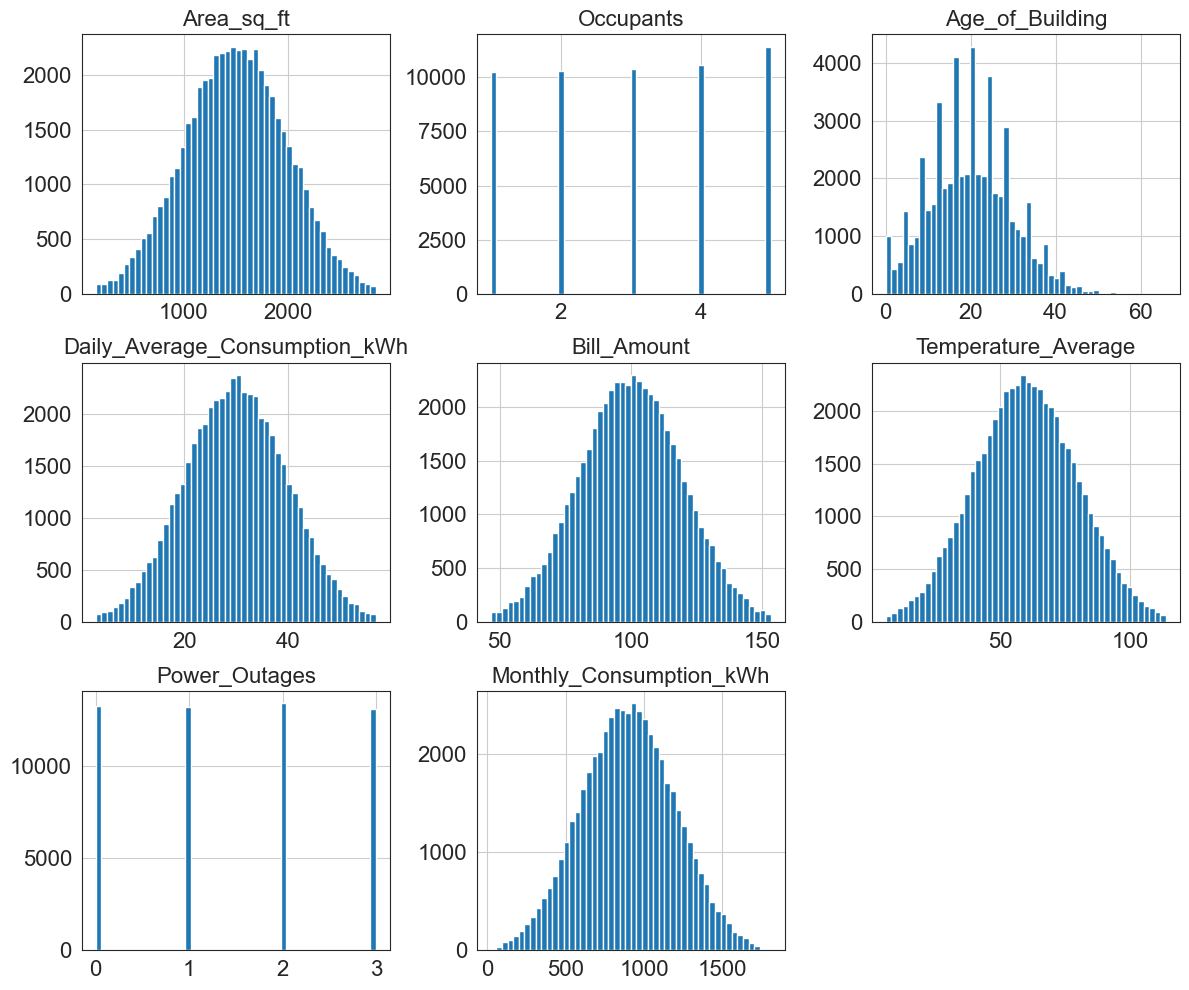

In [91]:
dfQuant.hist(bins=50, figsize=(12,10))
plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()

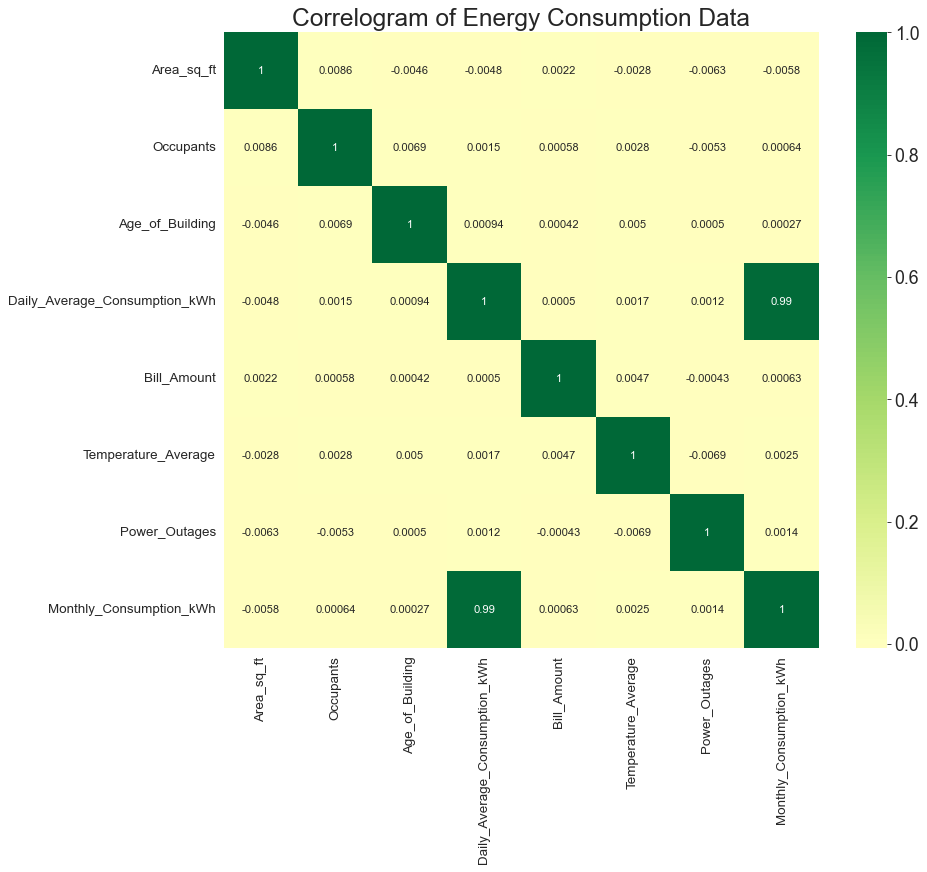

In [92]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(dfQuant.corr(), xticklabels=dfQuant.corr().columns, yticklabels=dfQuant.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of Energy Consumption Data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### kMeans
After exploring the data with a energy consumption corolla, I have concluded the data needs to be cleaned more as such I will use a kMean to attempt to make sense of it.

In [93]:
from sklearn.cluster import DBSCAN

In [94]:
# Assume 'df' is your DataFrame and you want to apply DBSCAN on 'Area_sq_ft' and 'Daily_Average_Consumption_kWh' columns
data = df[['Daily_Average_Consumption_kWh', 'Monthly_Consumption_kWh']]

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model
dbscan.fit(data)

# Get labels (if label is -1, it's an outlier)
labels = dbscan.labels_

# Filter the DataFrame
dfNoOutliers = df[labels != -1]

Text(0, 0.5, 'Daily_Average_Consumption_kWh')

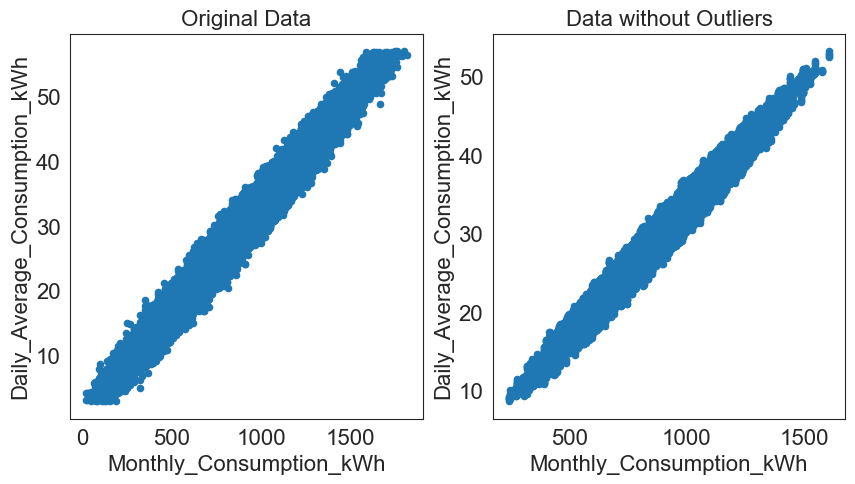

In [95]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

xColumn = 'Monthly_Consumption_kWh'
yColumn = 'Daily_Average_Consumption_kWh'

# Plot the original data
df.plot.scatter(x=xColumn, y=yColumn, ax=axs[0])
axs[0].set_title('Original Data')
axs[0].set_xlabel(xColumn)
axs[0].set_ylabel(yColumn)


# Plot the data without outliers
dfNoOutliers.plot.scatter(x=xColumn, y=yColumn, ax=axs[1])
axs[1].set_title('Data without Outliers')
axs[1].set_xlabel(xColumn)
axs[1].set_ylabel(yColumn)

In [96]:
df = dfNoOutliers

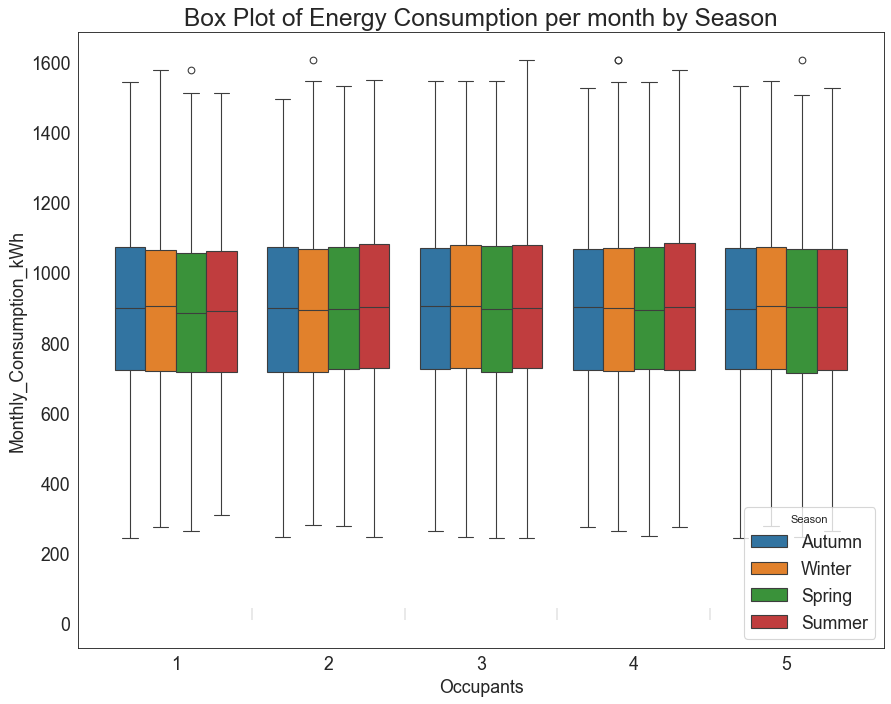

In [97]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='Occupants', y='Monthly_Consumption_kWh', data=df, hue='Season')
# sns.stripplot(x='Season', y='Monthly_Consumption_kWh', data=df, color='black', size=3, jitter=1)

for i in range(len(df['Occupants'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of Energy Consumption per month by Season', fontsize=22)
plt.legend(title='Season')
plt.show()

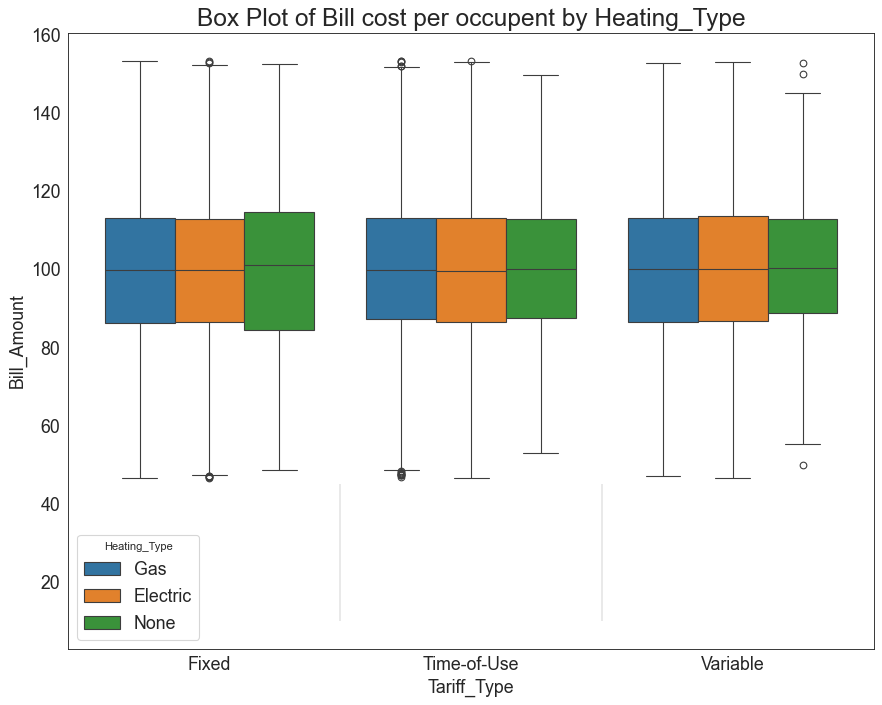

In [98]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='Tariff_Type', y='Bill_Amount', data=df, hue='Heating_Type')
# sns.stripplot(x='Season', y='Monthly_Consumption_kWh', data=df, color='black', size=3, jitter=1)

for i in range(len(df['Tariff_Type'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of Bill cost per occupent by Heating_Type', fontsize=22)
plt.legend(title='Heating_Type')
plt.show()

In [99]:
summer = df[df['Season'] == 'Summer']
winter = df[df['Season'] == 'Winter']
spring = df[df['Season'] == 'Spring']
autumn = df[df['Season'] == 'Autumn']

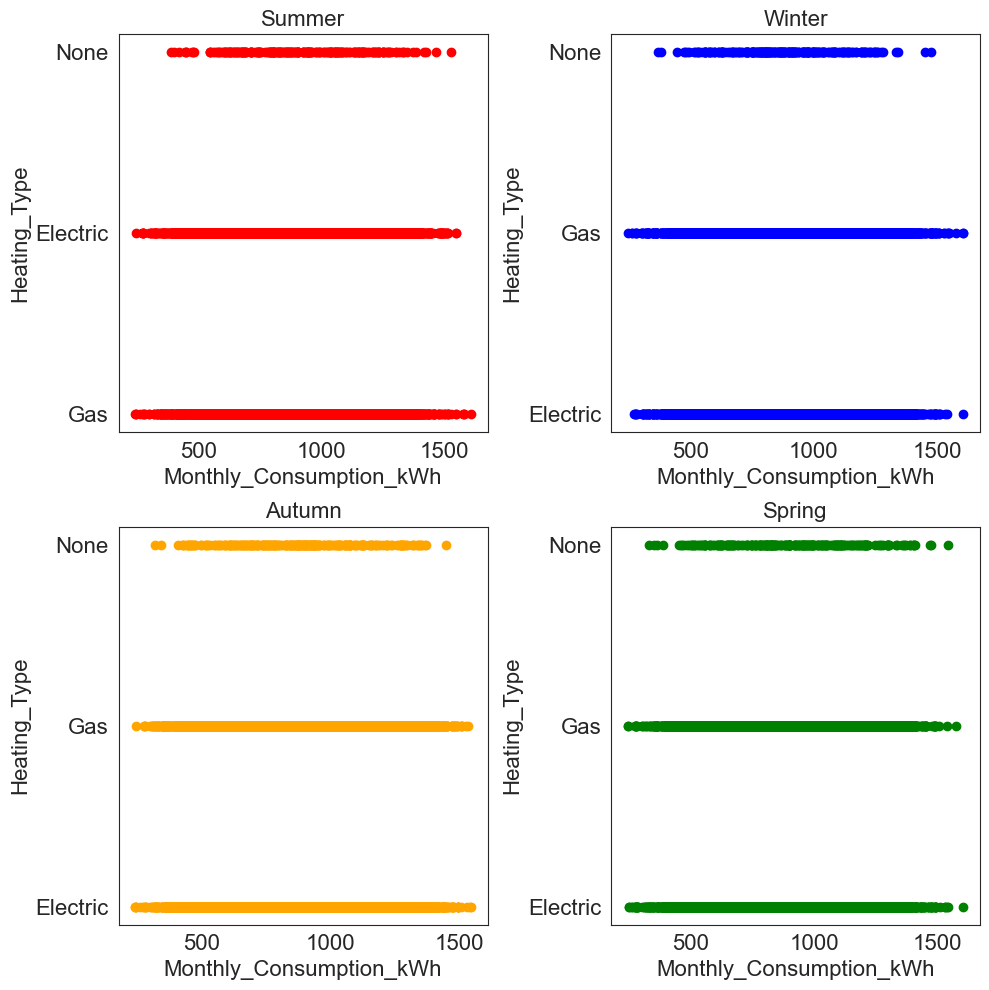

In [100]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

xColumn = 'Monthly_Consumption_kWh'
yColumn = 'Heating_Type'

# Summer plot
axs[0, 0].scatter(summer[xColumn], summer[yColumn], color='red')
axs[0, 0].set_title('Summer')

# Winter plot
axs[0, 1].scatter(winter[xColumn], winter[yColumn], color='blue')
axs[0, 1].set_title('Winter')

# Autumn plot
axs[1, 0].scatter(autumn[xColumn], autumn[yColumn], color='orange')
axs[1, 0].set_title('Autumn')

# Spring plot
axs[1, 1].scatter(spring[xColumn], spring[yColumn], color='green')
axs[1, 1].set_title('Spring')

for ax in axs.flat:
    ax.set(xlabel=xColumn, ylabel=yColumn)

plt.tight_layout()
plt.show()

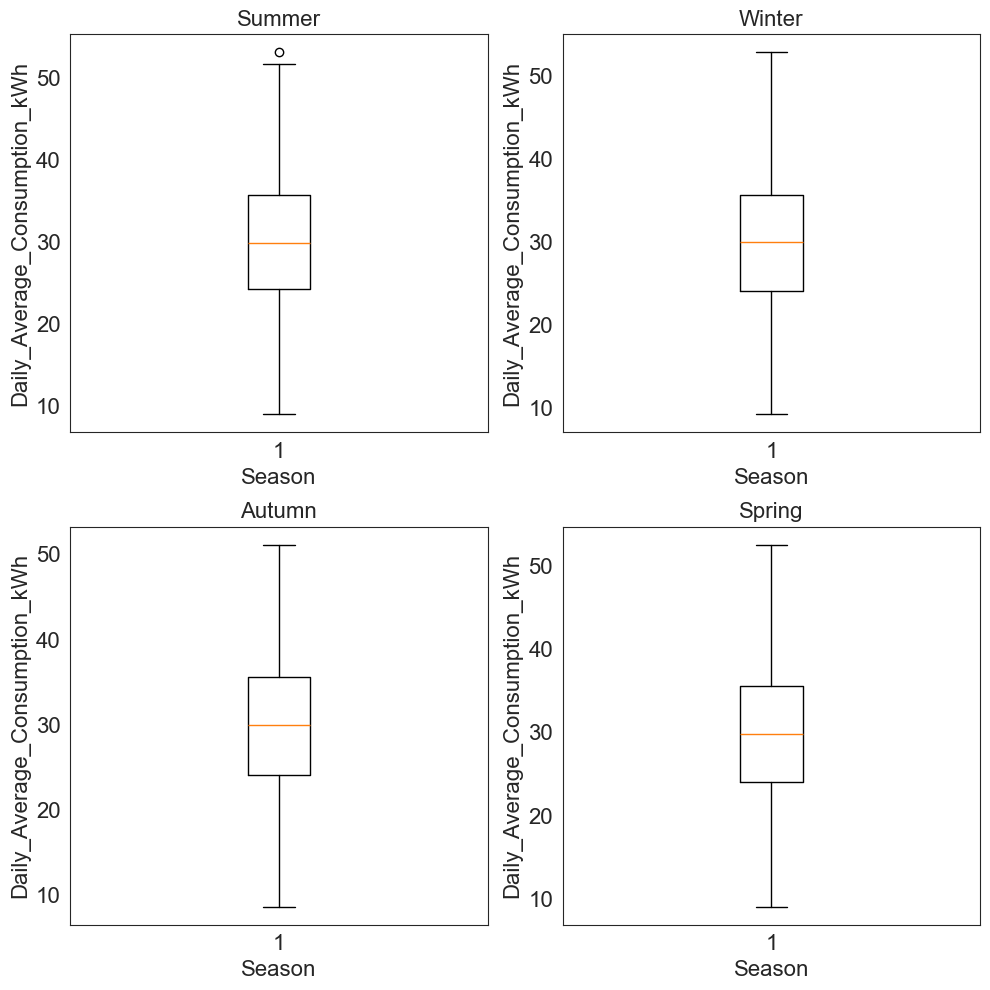

In [101]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

xColumn = 'Daily_Average_Consumption_kWh'

# Summer plot
axs[0, 0].boxplot(summer[xColumn])
axs[0, 0].set_title('Summer')

# Winter plot
axs[0, 1].boxplot(winter[xColumn])
axs[0, 1].set_title('Winter')

# Autumn plot
axs[1, 0].boxplot(autumn[xColumn])
axs[1, 0].set_title('Autumn')

# Spring plot
axs[1, 1].boxplot(spring[xColumn])
axs[1, 1].set_title('Spring')

for ax in axs.flat:
    ax.set(xlabel='Season', ylabel=xColumn)

plt.tight_layout()
plt.show()

In [102]:
def outliersBeGone(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    dfOut = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return dfOut

In [103]:
df = outliersBeGone(df, 'Daily_Average_Consumption_kWh')
dfSize(df)

Current size: (42551, 14)
Previous size: (52948, 14)


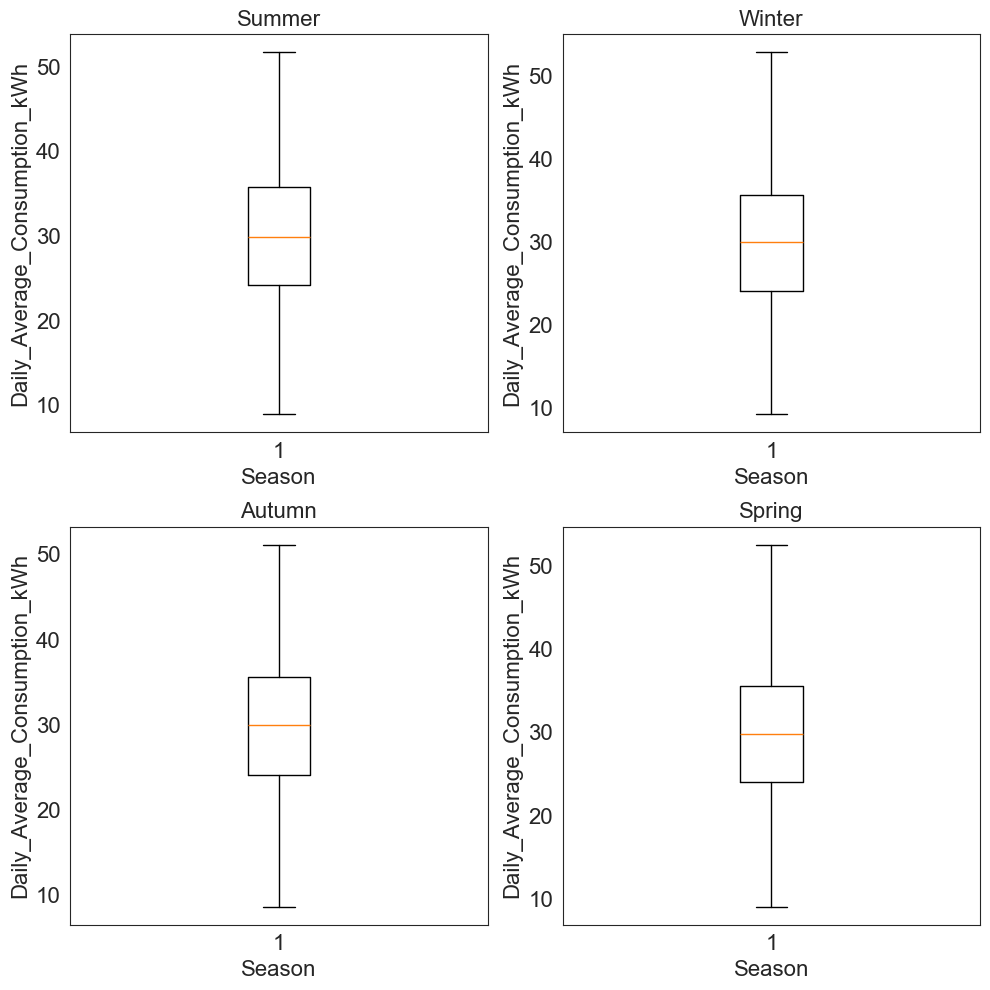

In [104]:
summer = df[df['Season'] == 'Summer']
winter = df[df['Season'] == 'Winter']
spring = df[df['Season'] == 'Spring']
autumn = df[df['Season'] == 'Autumn']
    
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

xColumn = 'Daily_Average_Consumption_kWh'

# Summer plot
axs[0, 0].boxplot(summer[xColumn])
axs[0, 0].set_title('Summer')

# Winter plot
axs[0, 1].boxplot(winter[xColumn])
axs[0, 1].set_title('Winter')

# Autumn plot
axs[1, 0].boxplot(autumn[xColumn])
axs[1, 0].set_title('Autumn')

# Spring plot
axs[1, 1].boxplot(spring[xColumn])
axs[1, 1].set_title('Spring')

for ax in axs.flat:
    ax.set(xlabel='Season', ylabel=xColumn)

plt.tight_layout()
plt.show()

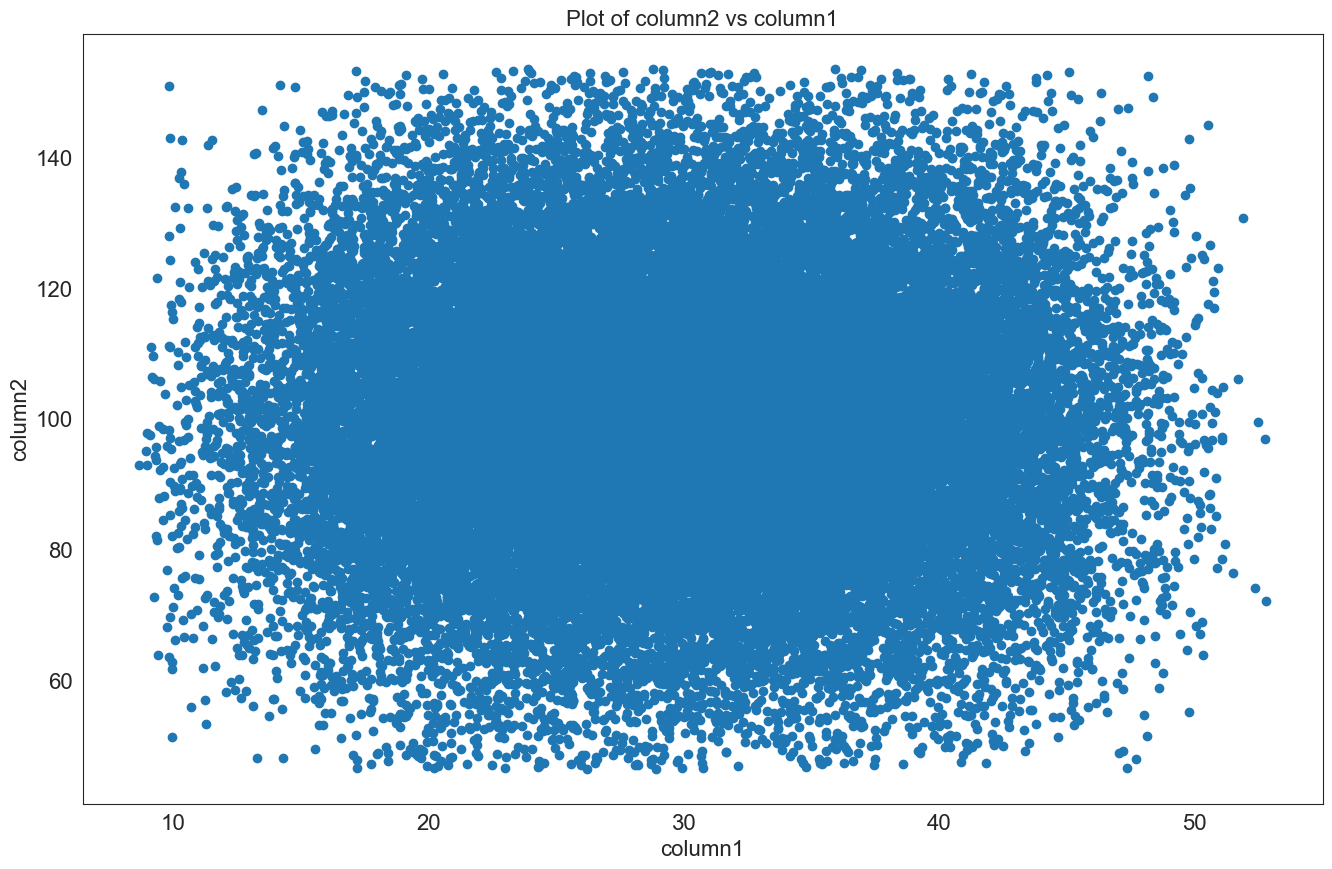

In [105]:
plt.scatter(df['Daily_Average_Consumption_kWh'], df['Bill_Amount'])

plt.xlabel('column1')
plt.ylabel('column2')
plt.title('Plot of column2 vs column1')

plt.show()

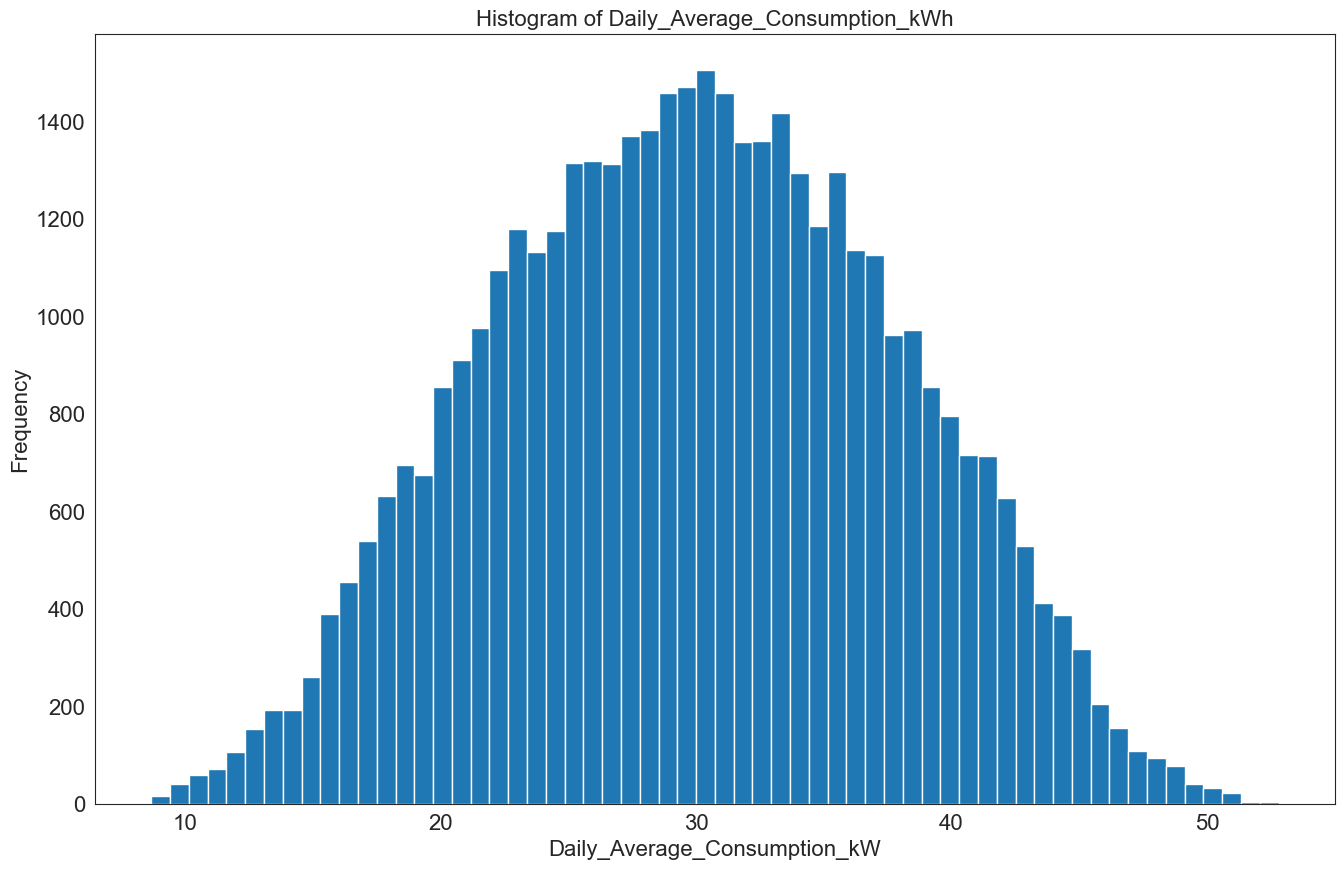

In [106]:
plt.hist(df['Daily_Average_Consumption_kWh'], bins=60)

plt.xlabel('Daily_Average_Consumption_kW')
plt.ylabel('Frequency')
plt.title('Histogram of Daily_Average_Consumption_kWh')

plt.show()

## Plots
1. split the dataset into seasons
2. 

In [107]:
plt.plot(df[])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1296034225.py, line 1)